### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2017 ###

# Project title goes here #

#### Rahul Singh (rsingh53@wisc.edu), Karan Talreja (talreja2@wisc.edu), and Heemanshu Suri (hsuri@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
  1. [Optional Subsection](#4.A.-Feel-free-to-add-subsections)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

With advances in robotics and immense focus on automation, dissemination of drones and robots in daily life in coming years is inevitable. Clearly, motion planning and navigation of unmanned aerial vehicles are areas of tremendous interest among researchers and scientists these days.

As a part of CS524 project, we aim to plan a tranjectory for hovercraft(s) from source to destination. While traversing from source to destination we aim to make hovercraft(s) visit pre-determined positions, avoid stationary and moving obstacles, and minimize thrust.

Building upon 2-D hovercraft problem discussed in class, we have solved the obstacle avoidance and collision avoidance problems. We started with the standard 2-D hovercraft problem in which a hovercraft travels from source (point $A$) to destination (point $B$), visiting the waypoints ( points $W_1, W_2, W3, \dots $ ) in between while minimizing thrust. As an extension to this problem, we introduced stationary obstacles in the path of hovercraft. Stationary obstacles are in the form of a 2-D rectangular area. If hovercraft enters the obstacle region, we consider it a hovercraft crash and an infeasible trajectory.

In more realistic settings, there are not only stationary obstacles but moving obstacles too. Consider the problem of trajectory optimization of a swarm of hovercrafts. To simulate more realistic scenario of moving obstacles, we have solved the above stated problem for multiple hovercrafts in which each hovercraft acts as moving obstacle for all other hovercrafts. In other words, there can not be two (or more) hovercrafts at the same location at the same time.

This project can serve as foundation for motion planning of drones and robots where the swarm is given the task to reach destination visiting some points in between while avoiding obstacles and collision. A real-life example is drone delivery of a large customer order from Amazon. Multiple drones fly from point $A$ to point $B$ while avoiding stationary obstacles such as buildings (while flying low or running on ground), and also avoiding collision from other drones.

We achieved these goals in different stages as shown in "Solution" section and are using synthetically generated data in our implementation. We have drawn plots to verify that hovercrafts are not colliding with either stationary or moving obstacles.

### ** TODO**
Rest of this project report is organized as follows: Section-2 talks about different mathematical models we used to solve above stated problems. Section-3 shows different stages of solution. We have implemented the solution in incremental fashion i.e. without any obstacle, with stationary obstacles, and with moving obstacles. We have also implemented least-square (L-2) tradeoff between thrust and visiting waypoints. Section-4 discusses results and plots various graphs such as XXXXX, YYYYY, ZZZZZZ . Section-5 concludes.


![fixit flowchart][flow]

For more help on using Markdown, see [this reference](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

[flow]: https://s-media-cache-ak0.pinimg.com/736x/f5/75/c5/f575c53b93724808c6f0211890a54900.jpg

## 2. Mathematical model ##



### 2A. Hovercraft Model


$$
\begin{aligned}
\underset{\mathbf{x_t,v_t,u_t} \in \mathbb{R}}{\text{Minimize}}\qquad& \sum_{t=0}^{T} \|{u_t}^2\| + \lambda\sum_{i=1}^{k} \| (x_{t_i} - w_i)^2 \| \\
\text{subject to:}\qquad& x_{t+1} = x_t + v_t && \forall t \in \{0, 1,\dots,T-1\}\\
\qquad& v_{t+1} = v_t + u_t && \forall t \in \{0, 1,\dots,T-1\} \\
\qquad& x_0 = v_0 = 0\\
\end{aligned}
$$


### 2B. Obstacle Avoidance
This section describes constraints to avoid stationary obstacles. Stationary obstacle can be any convex polygon, however for our implementation we chose to define stationary obstacle as a rectangular box. In 2-D plane, an obstacle is represented as (x,y) and is **bounded by bottom-left point ( $\mathbf { x_{ bl}, y_{ bl} }$ ) and top-right point ( $\mathbf { x_{tr}, y_{tr} }$ )** i.e.

$$
\begin{aligned}
\qquad& x_{bl} ≤ x ≤ x_{tr} && (1) \\
\qquad& x_{bl} ≤ x ≤ x_{tr} && (1) \\
\qquad& y_{bl} ≤ y ≤ y_{tr} && (2) \\
\end{aligned}
$$

A hovercraft is said to be crashed if it is inside the rectangular region of obstacle. Since a rectangular region is defined by following four lines: 

$$
\begin{aligned}
\qquad& x ≥ x_{bl}  && (3) \\ 
\qquad& x ≤ x_{tr} && (4) \\
\qquad& y ≥ y_{bl}  && (5) \\
\qquad& y ≤ y_{tr} && (6) \\
\end{aligned}
$$

With definition of obstacle from eq. (5), (6), (7), and (8), we can safely state that if a point (x,y) breaks any of the above four constraint, it will be outside the obstacle region. In other words, a hovercraft will not crash as long as it is satisfying three or lesser number of constraints (5) to (8).

To apply the above restriction, we transformed these constraints into *Mixed-Integer* form by adding a binary variable z. Let M be a number larger than the maximum possible value of x or y for any hovercraft, then we can represent the restriction stated in above paragraph as follows:

$$
\begin{aligned}
x ≤ x\_bl + M*z[1]  && (7) \\ 
-x ≤ -x\_tr  + M*z[2] && (8) \\
y ≤ y\_bl  + M*z[3]  && (9) \\
-y ≤ -y\_tr  + M*z[4] && (10) \\
z[1:4] \in \{0,1\} && (11) \\
sum(z[1:4]) ≤ 3 && (12) \\
\end{aligned}
$$

### 2C. Collision Avoidance
This section describes constraints to avoid collision of a hovercraft with another hovercraft. Although not implemented in this project, this concept can be extended to any moving obstacle by adding some extra constraints. In this, every two hovercrafts should be at some distance (more than minimum safe distance) from each other at any time. The minimum safe distance should be decided in every direction (North/Top, East/Right, South/Bottom, West/Left) and can be different in different directions. For simplicity, we have kept minimum safe distance same in every direction. Let $d_x$ be horizontal distance and $d_y$ be vertical distance between hovercraft $a$ and $b$. Then for hovercrafts to be safe from each other, they need to follow at-least :

$$
\begin{aligned}
\quad& x_a -x_b ≥ d_x  && (13) \\ 
\mathbf{or} \quad& x_b -x_a ≥ d_x && (14) \\
\mathbf{or} \quad& y_a -y_b ≥ d_y  && (15) \\ 
\mathbf{or} \quad& y_b -y_a ≥ d_y && (16) \\
\end{aligned}
$$

Similar to section 2B, we transformed these constraints into *Mixed-Integer* form by adding a binary variable obstacleS. Let M be a number larger than the maximum possible value of x or y for any hovercraft, then we can represent the collision avoidance model stated in above paragraph as follows:

$$
\begin{aligned}
\quad& x_a -x_b ≥ d_x - M*obstacleS[1]  && (17) \\ 
\quad& x_b -x_a ≥ d_x - M*obstacleS[2]  && (18) \\ 
\quad& y_a -y_b ≥ d_y - M*obstacleS[3]  && (19) \\ 
\quad& y_b -y_a ≥ d_y - M*obstacleS[4]  && (20) \\ 
\quad& obstacleS[1:4] \in \{0,1\} && (21) \\
\quad& sum(obstacleS[1:4]) ≤ 3 && (22) \\
\end{aligned}
$$


Here is an example of an equation:

$$
\begin{bmatrix}
  1 & 2 \\
  3 & 4
\end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix} =
\begin{bmatrix} 5 \\ 6 \end{bmatrix}
$$

And here is an example of an optimization problem in standard form:

$$
\begin{aligned}
\underset{x \in \mathbb{R^n}}{\text{maximize}}\qquad& f_0(x) \\
\text{subject to:}\qquad& f_i(x) \le 0 && i=1,\dots,m\\
& h_j(x) = 0 && j=1,\dots,r
\end{aligned}
$$

## 3. Solution ##

Here, you should code up your model in Julia + JuMP and solve it. Your code should be clean, easy to read, well annotated and commented, and it should compile! You are not allowed to use other programming languages or DCP packages such as `convex.jl`. **I will be running your code**. I suggest having multiple code blocks separated by text blocks that explain the various parts of your solution. You may also solve several versions of your problem with different models/assumptions.

It's fine to call external packages such as `Gurobi`, but try to minimize the use of exotic libraries.

### Data

In [1]:
using JuMP, Gurobi
    k = 3              # number of waypoints
    ko = 6             # number of obstacles
    N = 2              # number of hovercrafts
    T = zeros(Int,k)   # vector of timepoints
    xw = zeros(2,k)    # vector of waypoint locations
    xo = zeros(2,ko)   # vector of obstacle locations
    bbo = zeros(2,ko)  # bounding box around obstacle


    A = [1 0;
        -1 0;
        0 1;
        0 -1;]
    bo = zeros(4,ko)
    
    T[1] = 1
    T[2] = 20
    T[3] = 40
    #T[4] = 55
    #T[5] = 80

    # define waypoints
    xw = [5  17 30
          5  5  5]
    
    xo = [ 12  17  23  17  14.5   19.5
           5   8    5   2   6.5     3.5]
    
    bbo = [ 1.2  1.2 1.2  1.2  .7  .7
            1.2  1.2 2.2  1.2  .7  .7]

    for i in 1:ko
        bo[1,i] = xo[1,i] - bbo[1,i]
        bo[2,i] = -(xo[1,i] + bbo[1,i])
        bo[3,i] = xo[2,i] - bbo[2,i]
        bo[4,i] = -(xo[2,i] + bbo[2,i])
    end;

In [ ]:
m = Model(solver = GurobiSolver(OutputFlag=0))

@variable(m, x[1:2,1:T[k],1:N])  # resulting position
@variable(m, v[1:2,1:T[k],1:N])  # resulting velocity
@variable(m, u[1:2,1:T[k],1:N])  # thruster input
@variable(m, obstacle[1:ko,1:4,1:T[k],1:N], Bin)
@variable(m, obstacleS[1:4,1:T[k],1:N,1:N], Bin)
vMax = 1
# satisfy the dynamics (with zero initial velocity)
@constraint(m, v[:,1,:] .== [0;0])

for t in 1:T[k]-1
    @constraint(m, x[:,t+1,:] .== x[:,t,:] + v[:,t,:])
    @constraint(m, v[:,t+1,:] .== v[:,t,:] + u[:,t,:])
end


In [ ]:
# hit all the waypoints
for t in [1 k]
    @constraint(m, x[:,T[t],:] .== xw[:,t])
end


for n in 1:N
    for t in 1:T[k]
        @constraint(m, sum(v[:,t,n].^2) <= vMax)
    end
end


# minimize 2-norm (THIS IS LEAST-SQUARES)
λ = 100/100
@objective(m, Min, sum(u.^2) + λ*sum(sum((x[:,T[2:k],n]-xw[:,2:k]).^2 for n in 1:N)))
solve(m)
xopt=getvalue(x)

In [ ]:

# Avoid all obstacles
for n in 1:N
    for o in 1:ko
        for t in 1:T[k]-1
            @constraint(m, A*x[:,t,n] .<= bo[:,o] .+ 1000*obstacle[o,:,t,n])
            @constraint(m, sum(obstacle[o,i,t,n] for i in 1:4) <= 3)
        end
    end
end
@objective(m, Min, sum(u.^2) + λ*sum(sum((x[:,T[2:k],n]-xw[:,2:k]).^2 for n in 1:N)))
solve(m)
xopt=getvalue(x)

In [ ]:

for n1 in 1:N
    for n2 in 1:N
        if n1 != n2
            for t in 3:T[k]-3
                @constraint(m, x[1,t,n1] <= x[1,t,n2] - .5 + 1000*obstacleS[1,t,n1,n2])
                @constraint(m, -x[1,t,n1] <= -(x[1,t,n2] + .5) + 1000*obstacleS[2,t,n1,n2])
                @constraint(m, x[2,t,n1] <= x[2,t,n2] - .5 + 1000*obstacleS[3,t,n1,n2])
                @constraint(m, -x[2,t,n1] <= -(x[2,t,n2] + .5) + 1000*obstacleS[4,t,n1,n2])
                @constraint(m, sum(obstacleS[i,t,n1,n2] for i in 1:4) <= 3)
            end
        end
    end
end
@objective(m, Min, sum(u.^2) + λ*sum(sum((x[:,T[2:k],n]-xw[:,2:k]).^2 for n in 1:N)))
solve(m)
xopt=getvalue(x)

2×40×2 Array{Float64,3}:
[:, :, 1] =
 5.0  5.0  5.11985  5.35059  5.68325  …  28.1568   28.7722   29.3864   30.0
 5.0  5.0  4.75214  4.5207   4.30827      5.95663   5.64779   5.32691   5.0

[:, :, 2] =
 5.0  5.0  5.14067  5.40936  5.79344  …  28.3226   28.8832   29.442    30.0
 5.0  5.0  5.25214  5.49055  5.71105      3.89689   4.25219   4.62237   5.0

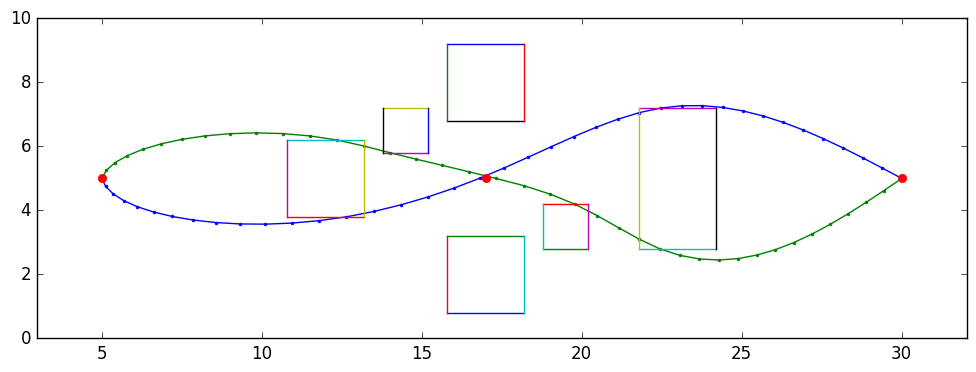

In [3]:
using PyPlot
figure(figsize=(12,4))
for n in 1:N 
    plot( xopt[1,:,n][:], xopt[2,:,n][:],".-", markersize=4 )
end

plot( xw[1,:], xw[2,:], "r.", markersize=12 )

for o in 1:ko
    # lower and upper lines
    plot(linspace(xo[1,o] - bbo[1,o],xo[1,o] + bbo[1,o],10),
        0.*linspace(xo[1,o] - bbo[1,o],xo[1,o] + bbo[1,o],10) .+ (xo[2,o] - bbo[2,o]))
    plot(linspace(xo[1,o] - bbo[1,o],xo[1,o] + bbo[1,o],10),
        0.*linspace(xo[1,o] - bbo[1,o],xo[1,o] + bbo[1,o],10) .+ (xo[2,o] + bbo[2,o]))

    # left and right lines
    plot(0.*linspace(xo[2,o] - bbo[2,o],xo[2,o] + bbo[2,o],10) .+ (xo[1,o] - bbo[1,o]),
        linspace(xo[2,o] - bbo[2,o],xo[2,o] + bbo[2,o],10))
    plot(0.*linspace(xo[2,o] - bbo[2,o],xo[2,o] + bbo[2,o],10) .+ (xo[1,o] + bbo[1,o]),
        linspace(xo[2,o] - bbo[2,o],xo[2,o] + bbo[2,o],10))
end
axis("equal");

Remember to make sure your code compiles! I will be running your code!

## 4. Results and discussion ##

Here, you display and discuss the results. Show figures, plots, images, trade-off curves, or whatever else you can think of to best illustrate your results. The discussion should explain what the results mean, and how to interpret them. You should also explain the limitations of your approach/model and how sensitive your results are to the assumptions you made.

Use plots (see `PyPlot` examples from class), or you can display results in a table like this:

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned |\$1600 |
| col 2 is      | centered      |  \$12 |
| zebra stripes | are neat      |   \$1 |

### 4.A. Feel free to add subsections

#### 4.A.a. or subsubsections

## 5. Conclusion ##

Summarize your findings and your results, and talk about at least one possible future direction; something that might be interesting to pursue as a follow-up to your project.